In [2]:
%matplotlib inline

import importlib
import numpy as np
import pr_util as util

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, neighbors

from generate_global_features_2 import generate_global_features
from experiments_3 import check_num_files

importlib.reload(util)

<module 'pr_util' from '/Users/felipefelix/USP/tcc/code/pr_util.py'>

In [13]:
# Randomly select n species from dataset

n_species = 2
n_min     = 10
scoring   = 'f1_weighted'
song_or_call = 'song'
data_dirs = util.choose_species(n_species)
data_dirs = check_num_files(data_dirs, song_or_call, n_species, n_min)


for dir in data_dirs:
    print(dir)
    

/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Trogon surrucura/ n files:92
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Myiophobus fasciatus/ n files:37
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Streptoprocne biscutata/ n files:6
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Streptoprocne biscutata/ n files:6
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Trichothraupis melanops/ n files:84
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Cnemotriccus fuscatus/ n files:27
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Emberizoides ypiranganus/ n files:12
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Cnemotriccus fuscatus/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Emberizoides ypiranganus/


In [14]:
# Generate n_global global features from a selected feature 'feat_name', 
# each one defined by a function in 'functions'.

n_global = 4
feat_name = 'spec_roll'
functions = [np.mean, np.std, np.max, np.min]
song_or_call = 'song'

labels_dict, labels, data = generate_global_features(n_global, feat_name, data_dirs, song_or_call, functions)

print(labels_dict)
print(labels)
print(data[:5])

{'Emberizoides Ypiranganus': 1, 'Cnemotriccus Fuscatus': 0}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1]
[[ 6696.11367618  1053.36460089  8548.68164062  3757.54394531]
 [ 5637.9144527     71.88806568  6675.29296875  5469.43359375]
 [ 6063.3356673    907.10219796  8925.51269531   829.02832031]
 [ 6350.26473943   319.40157464  8688.64746094  4898.80371094]
 [ 4612.24437131  1002.57336629  6341.52832031  1873.38867188]]


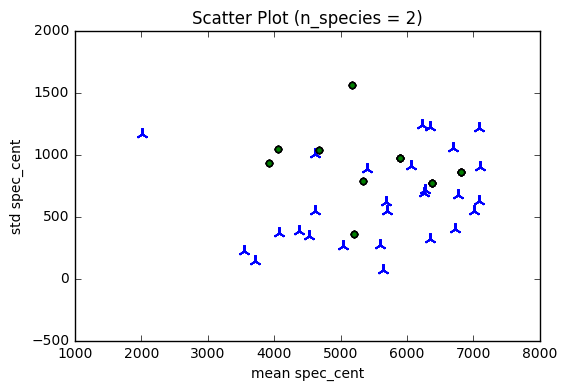

In [15]:
util.plot_scatter(data[:,0], data[:,1], labels, 'mean spec_cent', 'std spec_cent')

## kNN

In [16]:
#util.kNN(data, labels, range(3,10), 5)
clf     = neighbors.KNeighborsClassifier(3, weights = 'uniform')
scores  = cross_val_score(clf, data, labels, n_jobs = -1, cv = 5, scoring=scoring)
result  = '{0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2)
print('kNN: Accuracy: {0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2))
print(scores)


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


kNN: Accuracy: 0.64 (+/- 0.43)
[ 0.67532468  0.53333333  0.86349206  0.28571429  0.83982684]


## Naïve-Bayes

In [17]:
gnb    = GaussianNB()
scores = cross_val_score(gnb, data, labels, n_jobs = -1, cv = 5, scoring=scoring)
result = '{0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2)
print('GaussianNB - {0} : {1:.2f} (+/- {2:.2f})'.format(scoring,scores.mean(), scores.std() * 2))
print(scores)

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GaussianNB - f1_weighted : 0.59 (+/- 0.40)
[ 0.24242424  0.53333333  0.5952381   0.71428571  0.83982684]


## SVM

In [21]:

#kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
#kernels = ['linear', 'rbf', 'sigmoid', 'precomputed']
kernels = ['linear', 'rbf', 'sigmoid']
dfcs = ['ovo', 'ovr']
for kernel in kernels:
    for dfc in dfcs:
        print("--------------------------") 
        print("Kernel: {} DFC: {}".format(kernel, dfc))
        clf = svm.SVC(kernel = kernel, C = 1, decision_function_shape=dfc)
        scores = cross_val_score(clf, data, labels, verbose = 2, n_jobs = -1, cv = 3, scoring=scoring)
        result = '{0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2)
        print('SVM - {0} {1:.2f} (+/- {2:.2f})'.format(scoring, scores.mean(), scores.std() * 2))
        print(scores)


--------------------------
Kernel: linear DFC: ovo
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV] ................................................. , total=   0.8s
[CV] ................................................. , total=   1.0s
SVM - f1_weighted 0.55 (+/- 0.09)
[ 0.48461538  0.55576923  0.59803355]
--------------------------
Kernel: linear DFC: ovr


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished


[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ................................................. , total=   0.7s
[CV] ................................................. , total=   0.8s
[CV] ................................................. , total=   1.0s
SVM - f1_weighted 0.55 (+/- 0.09)
[ 0.48461538  0.55576923  0.59803355]
--------------------------
Kernel: rbf DFC: ovo


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished


[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV] ................................................. , total=   0.0s
[CV] ................................................. , total=   0.0s
SVM - f1_weighted 0.82 (+/- 0.17)
[ 0.71648352  0.91960671  0.82820513]
--------------------------
Kernel: rbf DFC: ovr


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV] ................................................. , total=   0.0s
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


SVM - f1_weighted 0.82 (+/- 0.17)
[ 0.71648352  0.91960671  0.82820513]
--------------------------
Kernel: sigmoid DFC: ovo
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................................. , total=   0.0s
[CV] ................................................. , total=   0.0s
[CV] ................................................. , total=   0.0s
SVM - f1_weighted 0.57 (+/- 0.00)
[ 0.56643357  0.56643357  0.56643357]
--------------------------
Kernel: sigmoid DFC: ovr


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................


/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/felipefelix/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................................. , total=   0.0s
[CV] ................................................. , total=   0.0s
[CV] ................................................. , total=   0.0s
SVM - f1_weighted 0.57 (+/- 0.00)
[ 0.56643357  0.56643357  0.56643357]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
